# Matemática cheirada para distrair a mente



[**Cleuton Sampaio**](https://linkedin.com/in/cleutonsampaio)


Este código gera um **efeito visual fascinante**, baseado na **interferência de movimentos harmônicos simples** distribuídos espacialmente. Vamos explorar a **matemática por trás desse fenômeno**, passo a passo.

## 1. O que o código faz?

O programa:

- Cria uma **grade (grid)** de círculos em posições fixas no plano.
- Cada círculo tem um ponto que se move **circularmente com velocidade angular constante**.
- Cada ponto tem um **desfasamento (φ)** diferente, dependendo da sua posição na grade.
- A animação mostra como esses pontos parecem formar **ondas viajantes ou padrões dinâmicos**.

## 2. Matemática do Movimento Circular

Cada ponto executa um **movimento circular uniforme**, descrito por:

$$
x(t) = R \cos(\omega t + \phi) \\
y(t) = R \sin(\omega t + \phi)
$$

Onde:
- $ R $: raio do círculo
- $ \omega $: velocidade angular (constante para todos os pontos)
- $ t $: tempo
- $ \phi $: fase inicial do movimento

Essa é a equação paramétrica de um círculo. Pode também ser representada de forma complexa como:

$$
z(t) = R e^{i(\omega t + \phi)}
$$

Essa notação complexa é útil para entender o **conceito de fasores**, usados em teoria de ondas e Fourier.

## 3. Fase Espacialmente Variável

No código, cada ponto na grade recebe uma **fase diferente**, dada por:

```python
passo_fase = 2 * np.pi / (linhas + colunas)

fases = [
    (i + j) * passo_fase
    for j in range(linhas)
    for i in range(colunas)
]
```

Isso significa que a fase varia linearmente com a posição do ponto na grade:

$$
\phi(x, y) = k x + \ell y
$$

Neste caso, $ k = \ell = \text{passo\_fase} $, e as coordenadas $ x, y $ são discretizadas (determinadas pelos índices $ i, j $).

Esse **gradiente de fase no espaço** é o que cria o efeito de "ondas" que se propagam pela grade.

## 4. Interferência Construtiva e Destrutiva

Como todos os pontos oscilam com a mesma frequência, mas fases diferentes, ocorre um fenômeno conhecido como **interferência espacial**:

- Em certas regiões, os pontos estão **alinhados em fase**, criando picos claros ou linhas visíveis → **interferência construtiva**
- Em outras, os pontos estão **fora de fase**, cancelando-se mutuamente → **interferência destrutiva**

Essa ideia é análoga às **ondas coletivas** emergindo da soma de oscilações individuais — como acontece com ondas sonoras ou eletromagnéticas.

## 5. Analogia com Séries de Fourier e Transformações de Ondas

A soma dos vetores rotacionais (fasores) pode ser vista como uma **soma de exponenciais complexas**:

$$
Z(t) = \sum_{n=1}^N e^{i(\omega t + \phi_n)} = e^{i \omega t} \sum_{n=1}^N e^{i \phi_n}
$$

Ou seja, a parte temporal é comum, e o padrão espacial está codificado nos $ \phi_n $. Isso lembra:

- **Fasores** em eletricidade
- **Transformada de Fourier discreta**
- **Série de Fourier bidimensional**

Você está, na verdade, gerando uma **superposição de ondas planas com diferentes direções de propagação**, definidas pelo gradiente de fase.

## 6. Por que vemos "ondas viajantes"?

Mesmo que cada ponto esteja girando independentemente, o **padrão global** parece se mover. Isso ocorre porque:

- A diferença de fase entre pontos vizinhos é pequena.
- Com o tempo, a fase global avança (devido ao termo $ \omega t $).
- O resultado é que a **linha de interferência construtiva** se move no espaço — simulando uma **onda viajante**.

Esse é o mesmo princípio por trás de **ondas de matéria**, **holografia**, e até **fenômenos auditivos como batimentos**.

## Essa é a matemática

| Conceito | Descrição |
|--------|-----------|
| **Movimento individual** | $ z(t) = R e^{i(\omega t + \phi)} $ |
| **Fase espacial** | $ \phi(i,j) = (i+j)\cdot \Delta\phi $ |
| **Interferência** | Soma espacial de fasores com diferentes fases |
| **Efeito visual** | Linhas claras/curvas que se movem → ondas emergentes |


In [ ]:
pip install numpy matplotlib pillow

Animação salva em circulos.gif


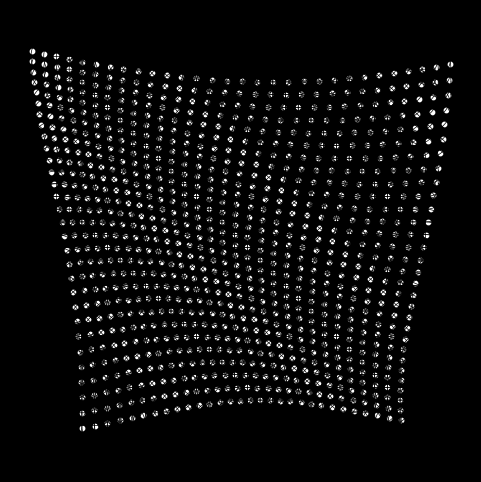

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

# --- Parâmetros ---
linhas, colunas            = 30, 30           # número de linhas e colunas de círculos
raio                       = 1.0              # raio de cada círculo
espacamento                = 0.5              # distância entre centros (< 2*raio para sobreposição)
quadros                    = 60               # número de quadros na animação
quadros_por_segundo        = 15               # frames por segundo do GIF
resolucao                  = 80               # pontos para desenhar cada círculo
passo_fase                 = 2 * np.pi / (linhas + colunas)

# Pré-calcula centros e fases
centros = [
    (i * espacamento, j * espacamento)
    for j in range(linhas)
    for i in range(colunas)
]
fases = np.array([
    (i + j) * passo_fase
    for j in range(linhas)
    for i in range(colunas)
])

# Cria figura e eixos com fundo preto
figura, eixos = plt.subplots(figsize=(6, 6))
figura.patch.set_facecolor('black')  # Fundo da figura
eixos.set_facecolor('black')         # Fundo dos eixos
eixos.set_aspect('equal')
eixos.axis('off')

# Desenha todos os círculos estáticos em preto
ang = np.linspace(0, 2 * np.pi, resolucao)
for (cx, cy) in centros:
    x_circ = cx + raio * np.cos(ang)
    y_circ = cy + raio * np.sin(ang)
    eixos.plot(x_circ, y_circ, color='black', linewidth=0.5)  # Cor do círculo

# Coleção de pontos móveis em branco
pontos = eixos.scatter([], [], s=10, c='white')  # Cor dos pontos

# Função de inicialização
def inicializa():
    pontos.set_offsets(np.empty((0, 2)))
    return (pontos,)

# Função de atualização por quadro
def atualiza(indice):
    angulos = indice * (2 * np.pi / quadros) + fases
    xs = [cx + raio * np.cos(a) for (cx, _), a in zip(centros, angulos)]
    ys = [cy + raio * np.sin(a) for (_, cy), a in zip(centros, angulos)]
    pontos.set_offsets(np.c_[xs, ys])
    return (pontos,)

# Cria a animação
animacao = animation.FuncAnimation(
    figura,
    atualiza,
    frames=quadros,
    init_func=inicializa,
    blit=True,
    interval=1000 / quadros_por_segundo
)

# Salva em GIF
caminho_gif = 'circulos.gif'
animacao.save(caminho_gif, writer=PillowWriter(fps=quadros_por_segundo))

# Para aparecer no Jupyter
from IPython.display import HTML
HTML(animacao.to_jshtml())

print(f"Animação salva em {caminho_gif}")